In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from analyze_src.basic_data_inspection import DataInspector, DataTypeInspectionStrategy, SummaryStatisticInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, CategoricalUnivariateAnalysis, NumericalUnivariateAnalysis, UnivariateAnalysisStrategy
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalBivariateAnalysis, BivariateAnalysisStrategy
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
data_path = '../extracted_data/AmesHousing.csv'
df = pd.read_csv(data_path)

In [3]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,

In [4]:
data_inspector = DataInspector(SummaryStatisticInspectionStrategy())
data_inspector.execute_inspection(df)


Summary statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     

In [5]:
# data_inspector.set_strategy(DataTypeInspectionStrategy())
# data_inspector.execute_inspection(df)

In [6]:
# plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
# plt.xlabel('Sale Price')
# plt.ylabel('Frequency')
# plt.title('Distribution of Sale Price')
# plt.show()
## plt.clf()

#### **Summary Statistics:**
- The target variable `SalePrice` has mean of **$180796** and std **$79886** indicating that the data is widely spread.
- With median **$160000** being smaller than mean indicating the `SalePrice` is right skewed.
- `Overall Qual` is the scale from 1 to 10, with mean **6.4** indicating that housed are generally of good quality.
- `Year Built` ranges from **1872** to **2010** indicating houses are too old and comparitively new.
- `Lot Area` has wide range with extream outlier **215,245 sq ft**, which indicat larger properties.


Missing Values percentage by column:
                missing_values  missing_values_percentage
Lot Frontage               490                  16.723549
Alley                     2732                  93.242321
Mas Vnr Type              1775                  60.580205
Mas Vnr Area                23                   0.784983
Bsmt Qual                   80                   2.730375
Bsmt Cond                   80                   2.730375
Bsmt Exposure               83                   2.832765
BsmtFin Type 1              80                   2.730375
BsmtFin SF 1                 1                   0.034130
BsmtFin Type 2              81                   2.764505
BsmtFin SF 2                 1                   0.034130
Bsmt Unf SF                  1                   0.034130
Total Bsmt SF                1                   0.034130
Electrical                   1                   0.034130
Bsmt Full Bath               2                   0.068259
Bsmt Half Bath               2    

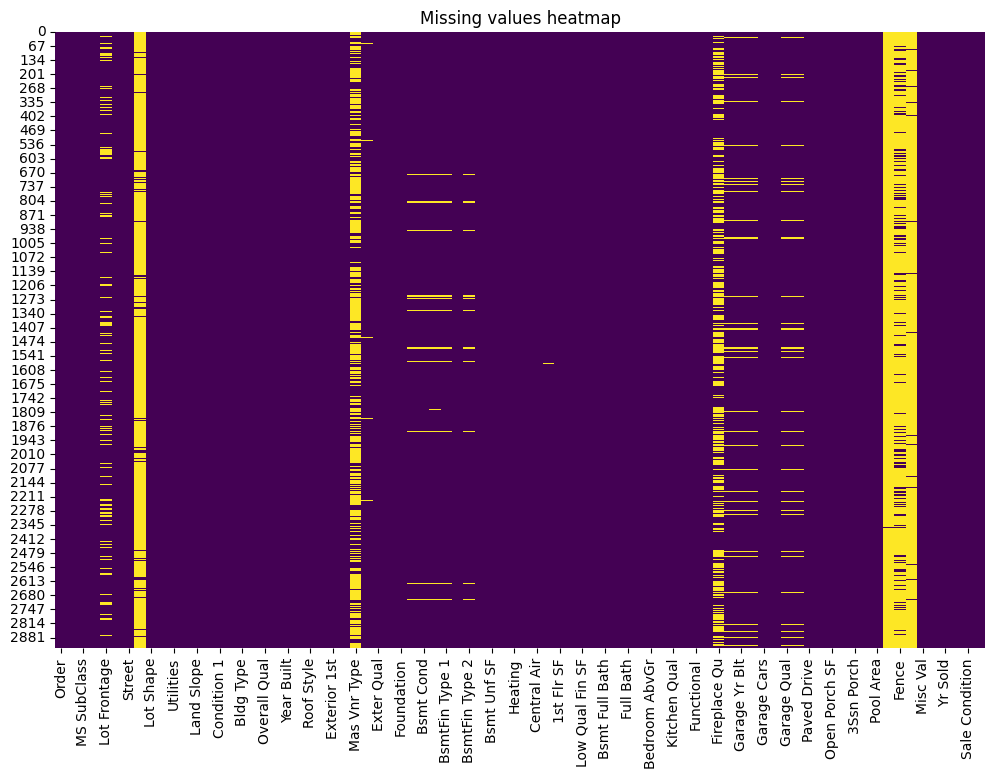

In [7]:
simple_missing_values_analysis = SimpleMissingValuesAnalysis()
simple_missing_values_analysis.analyze(df)

#### **Missing Values Analysis:**
##### Properties with significant missing values
- `Alley` has **2732 (93.4%)** missing values, making it unusable without imputation or transformation.
-  `Pool QC` (pool quality) has **2917 (99.5%)** missing values, indicating most of the houses don't have the pool.
- `Fence` has **2732 (93.4%)** missing values, suggesting that many houses do not have miscellaneous features, or they were not recorded.
- `Misc Feature` has **2732 (93.4%)** missing values, suggesting that many houses do not have miscellaneous features, or they were not recorded.

##### Properties with moderate missing values
- `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` each have around 80(~2.7%) missing values likely indicating houses without basement.
- `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` each have around 160(~5.4%) indicating houses without garages.

##### Properties with single missing values
- Several features, such as `BsmtFin SF 1`, `Total Bsmt SF`, `Electrical`, `Garage Cars`, `Garage Area`, etc., have only one or two missing values, which can likely be imputed without much impact.

### **Issues to be Addressed Later**

1. **Handling Missing Data:**
   - **Significant Missing Values**: Columns like `Alley`, `Pool QC`, `Fence`, and `Misc Feature` have a very high percentage of missing data. Decisions need to be made whether to:
     - Drop these columns entirely, as they might not add significant value.
     - Impute missing values with a placeholder (e.g., "None" or "No Pool") to retain them in the analysis.
   - **Moderate Missing Values**: Features related to basements and garages will require careful handling. Missing values could be filled with "No Basement" or "No Garage" for categorical features, and zeros for numerical ones.
   - **Single Missing Values**: These can likely be filled with the mode or mean for categorical and numerical features, respectively.

2. **Outlier Detection and Handling**:
   - Features like `Lot Area`, `Gr Liv Area`, and `SalePrice` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.

3. **Categorical Encoding**:
   - Categorical features like `Neighborhood`, `MS Zoning`, `Bldg Type`, and `Exterior 1st` have many unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, label encoding, or frequency encoding) based on their relationship with the target variable.

4. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

5. **Correlation and Multicollinearity**:
   - Initial correlation analysis suggests that some features might be highly correlated with each other (e.g., basement-related features). This could lead to multicollinearity issues, which need to be addressed during feature selection.


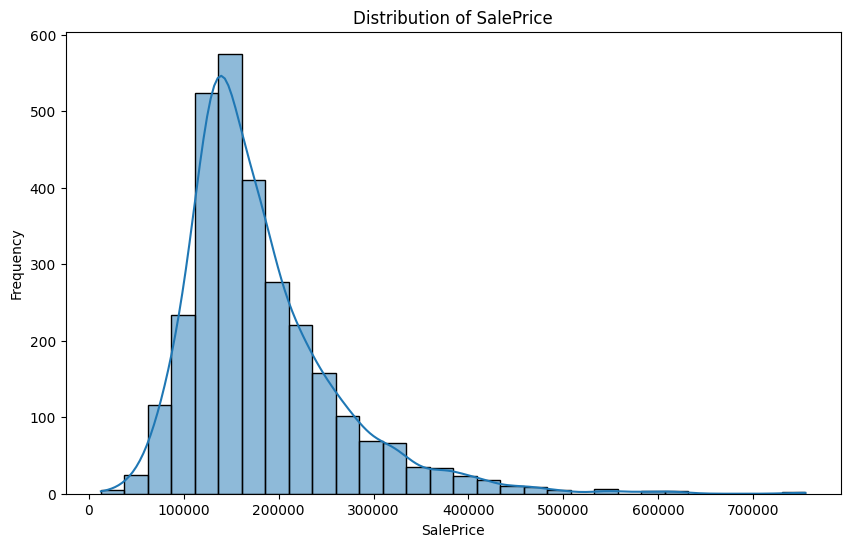

In [4]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.analyze(df, 'SalePrice')

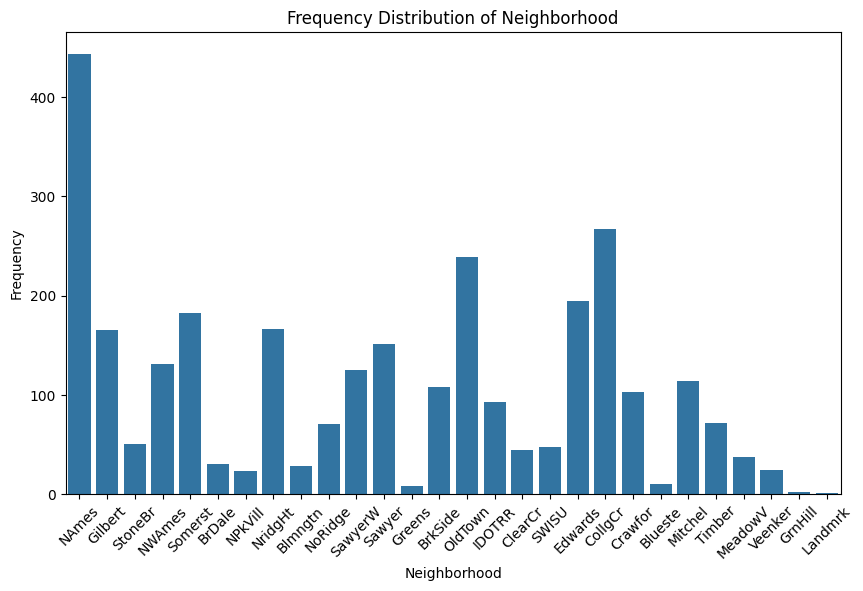

In [5]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.analyze(df, 'Neighborhood')

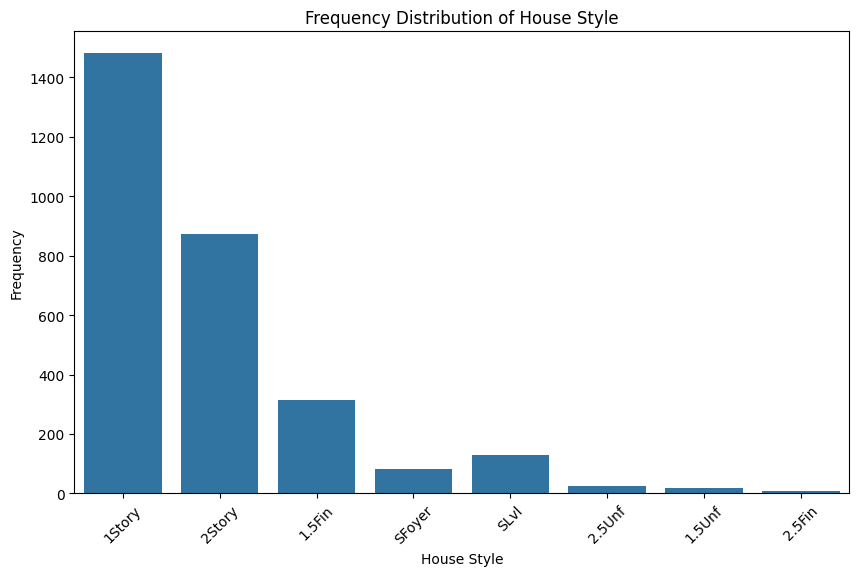

In [10]:
univariate_analyzer.analyze(df, 'House Style')

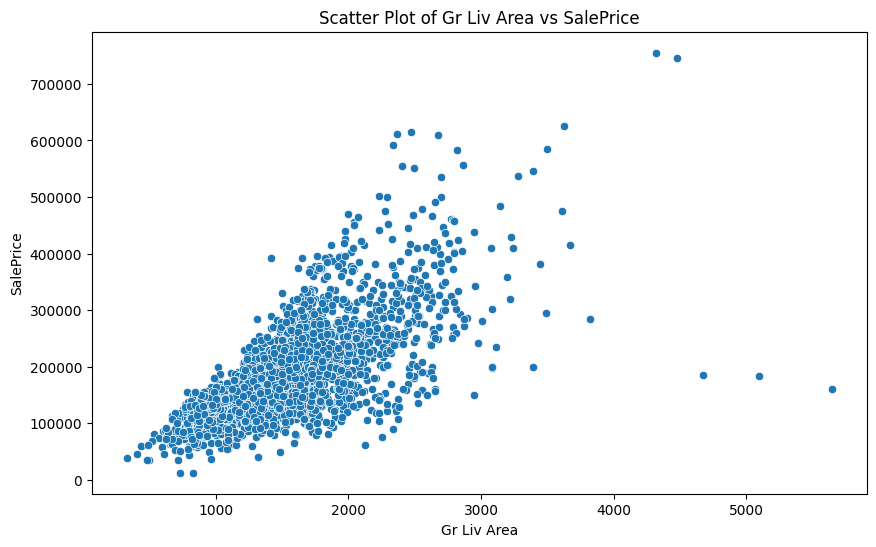

In [17]:
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.analyze(df, 'Gr Liv Area', 'SalePrice')
# bivariate_analyzer.analyze(df, 'Lot Area', 'SalePrice')

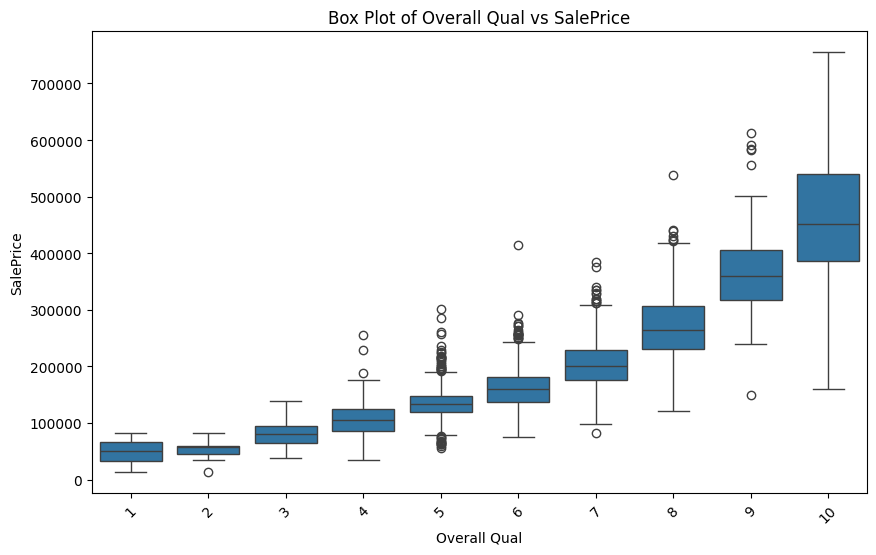

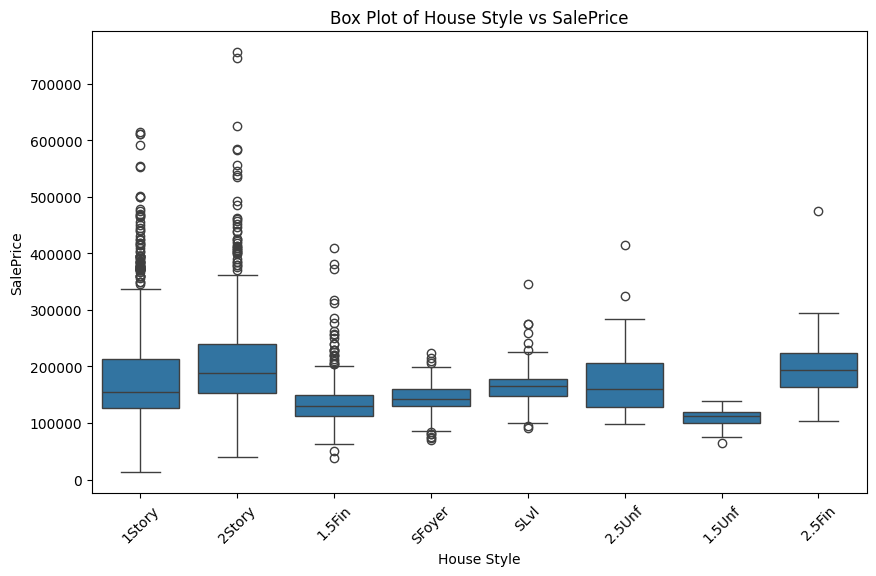

In [20]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalBivariateAnalysis())
bivariate_analyzer.analyze(df,'Overall Qual', 'SalePrice')
bivariate_analyzer.analyze(df,'House Style', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**

#### **Univariate Analysis**

1. **SalePrice Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `SalePrice` is positively skewed, with the majority of house prices falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   - **Implication**: This skewness suggests that most homes in the dataset are relatively affordable, with fewer high-end properties. The long tail on the right side indicates a small number of more expensive homes, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Neighborhood Distribution (Categorical Feature)**:
   - **Insight**: The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication**: The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

3. **House Style Distribution (Categorical Feature)**:
   - **Insight**: The `House Style` feature shows a varied distribution, with `1Story` being the most common Style, followed by `2Story` and `1.5FIn`.
   - **Implication**: The data shows we have 1Story properties the most.

#### **Bivariate Analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

3. **House Style vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is no specific relationship between `House Style` and `SalePrice`. We can say that 2 story buildings have higher average prices. So the number of stories and style doesn't affect house price.   

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.

### **Perform Multivariate Analysis**

In [6]:
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

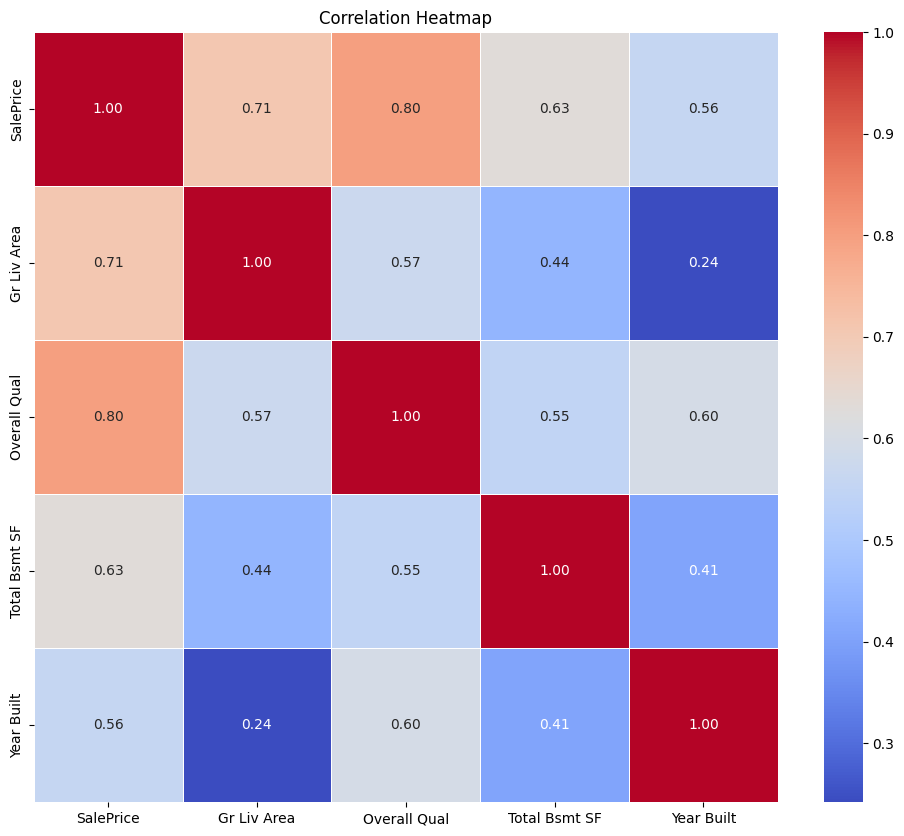

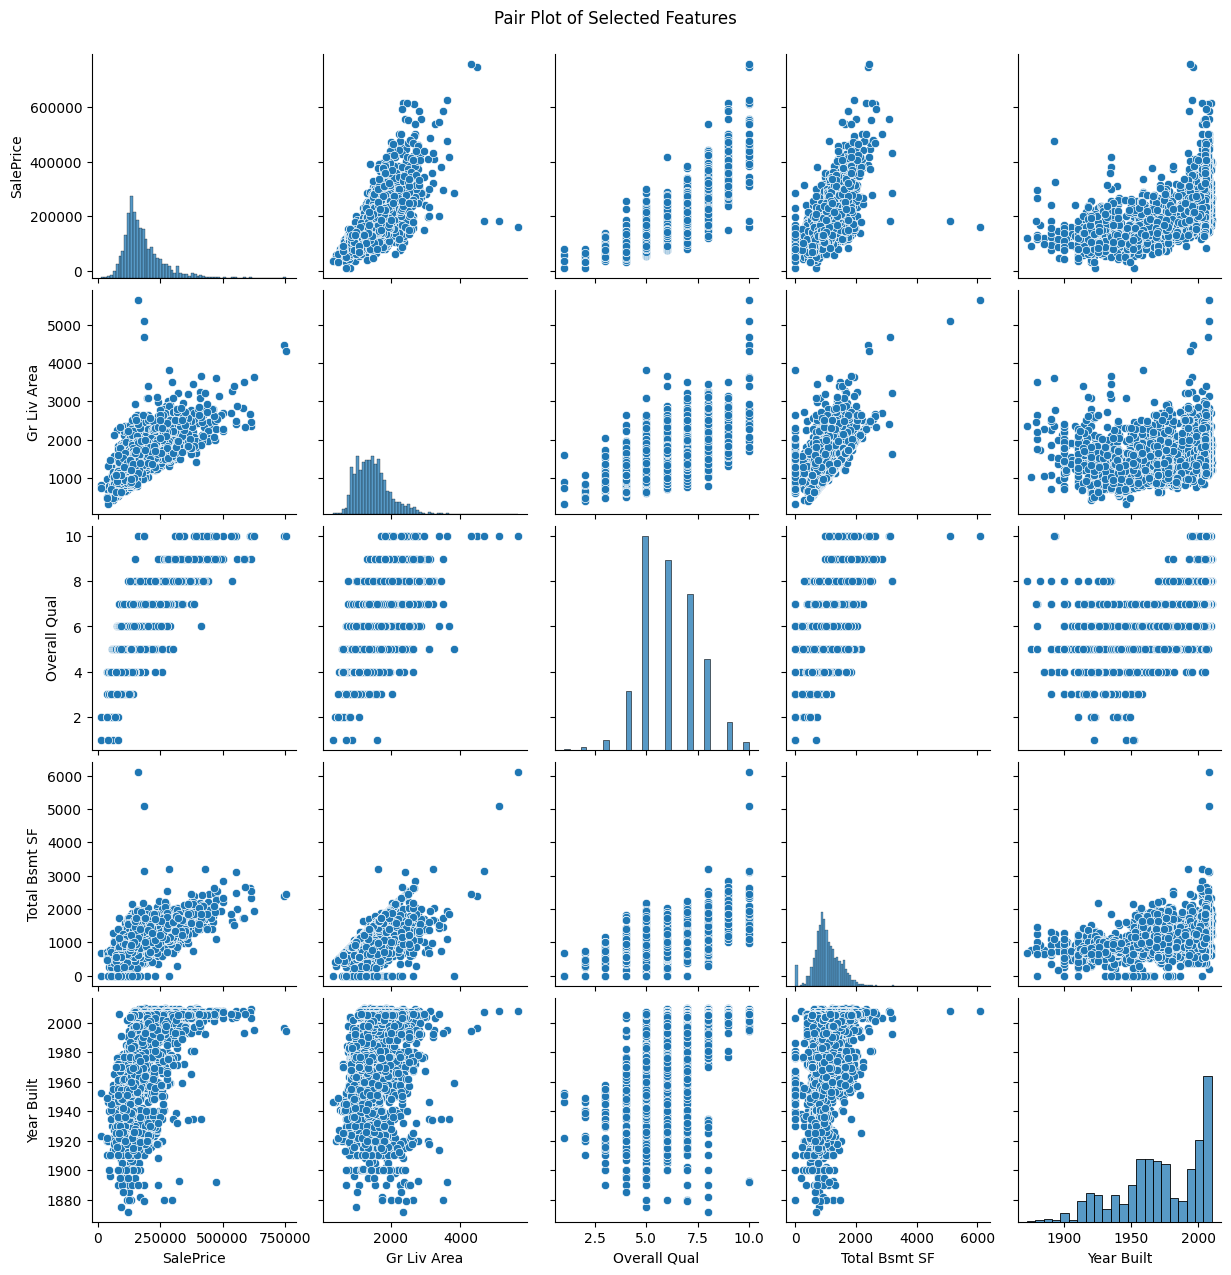

In [6]:
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

In [12]:
df.select_dtypes(include=[np.number]).columns.tolist()


['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [13]:
selected_features2 = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built', 'Garage Cars', 'Lot Area', 'Low Qual Fin SF', 'Year Remod/Add']]

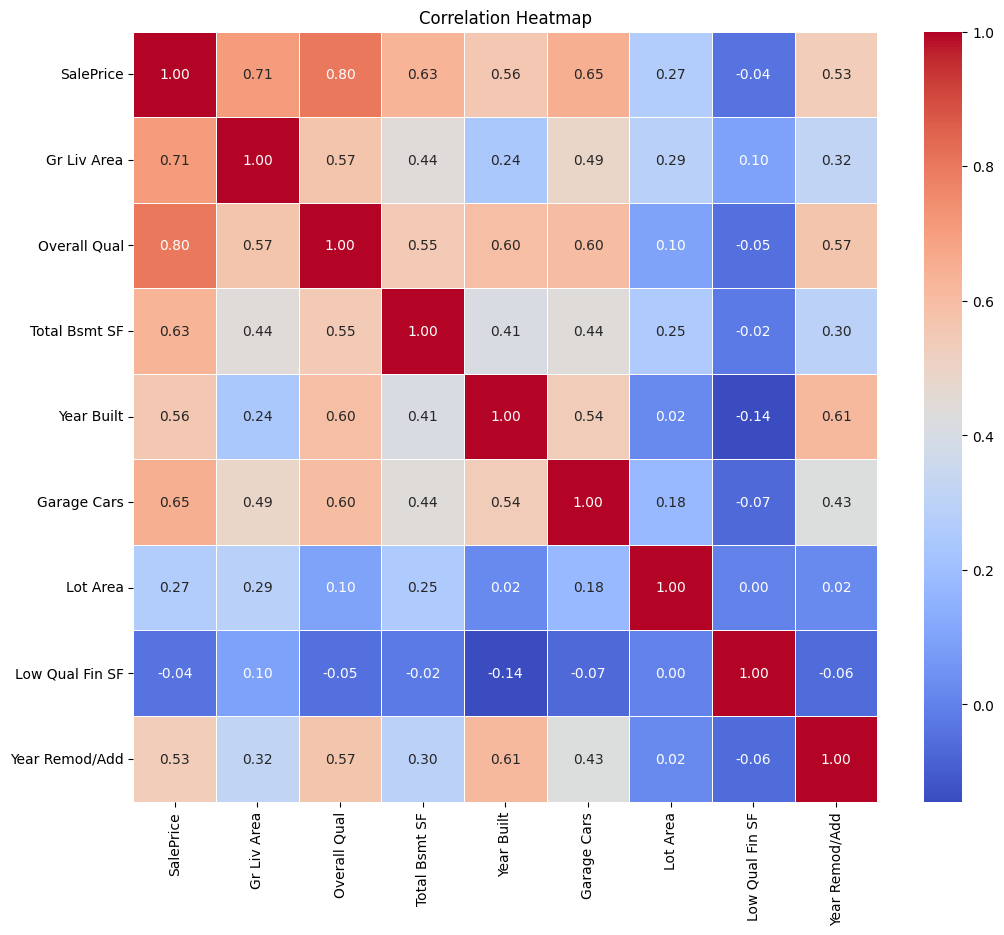

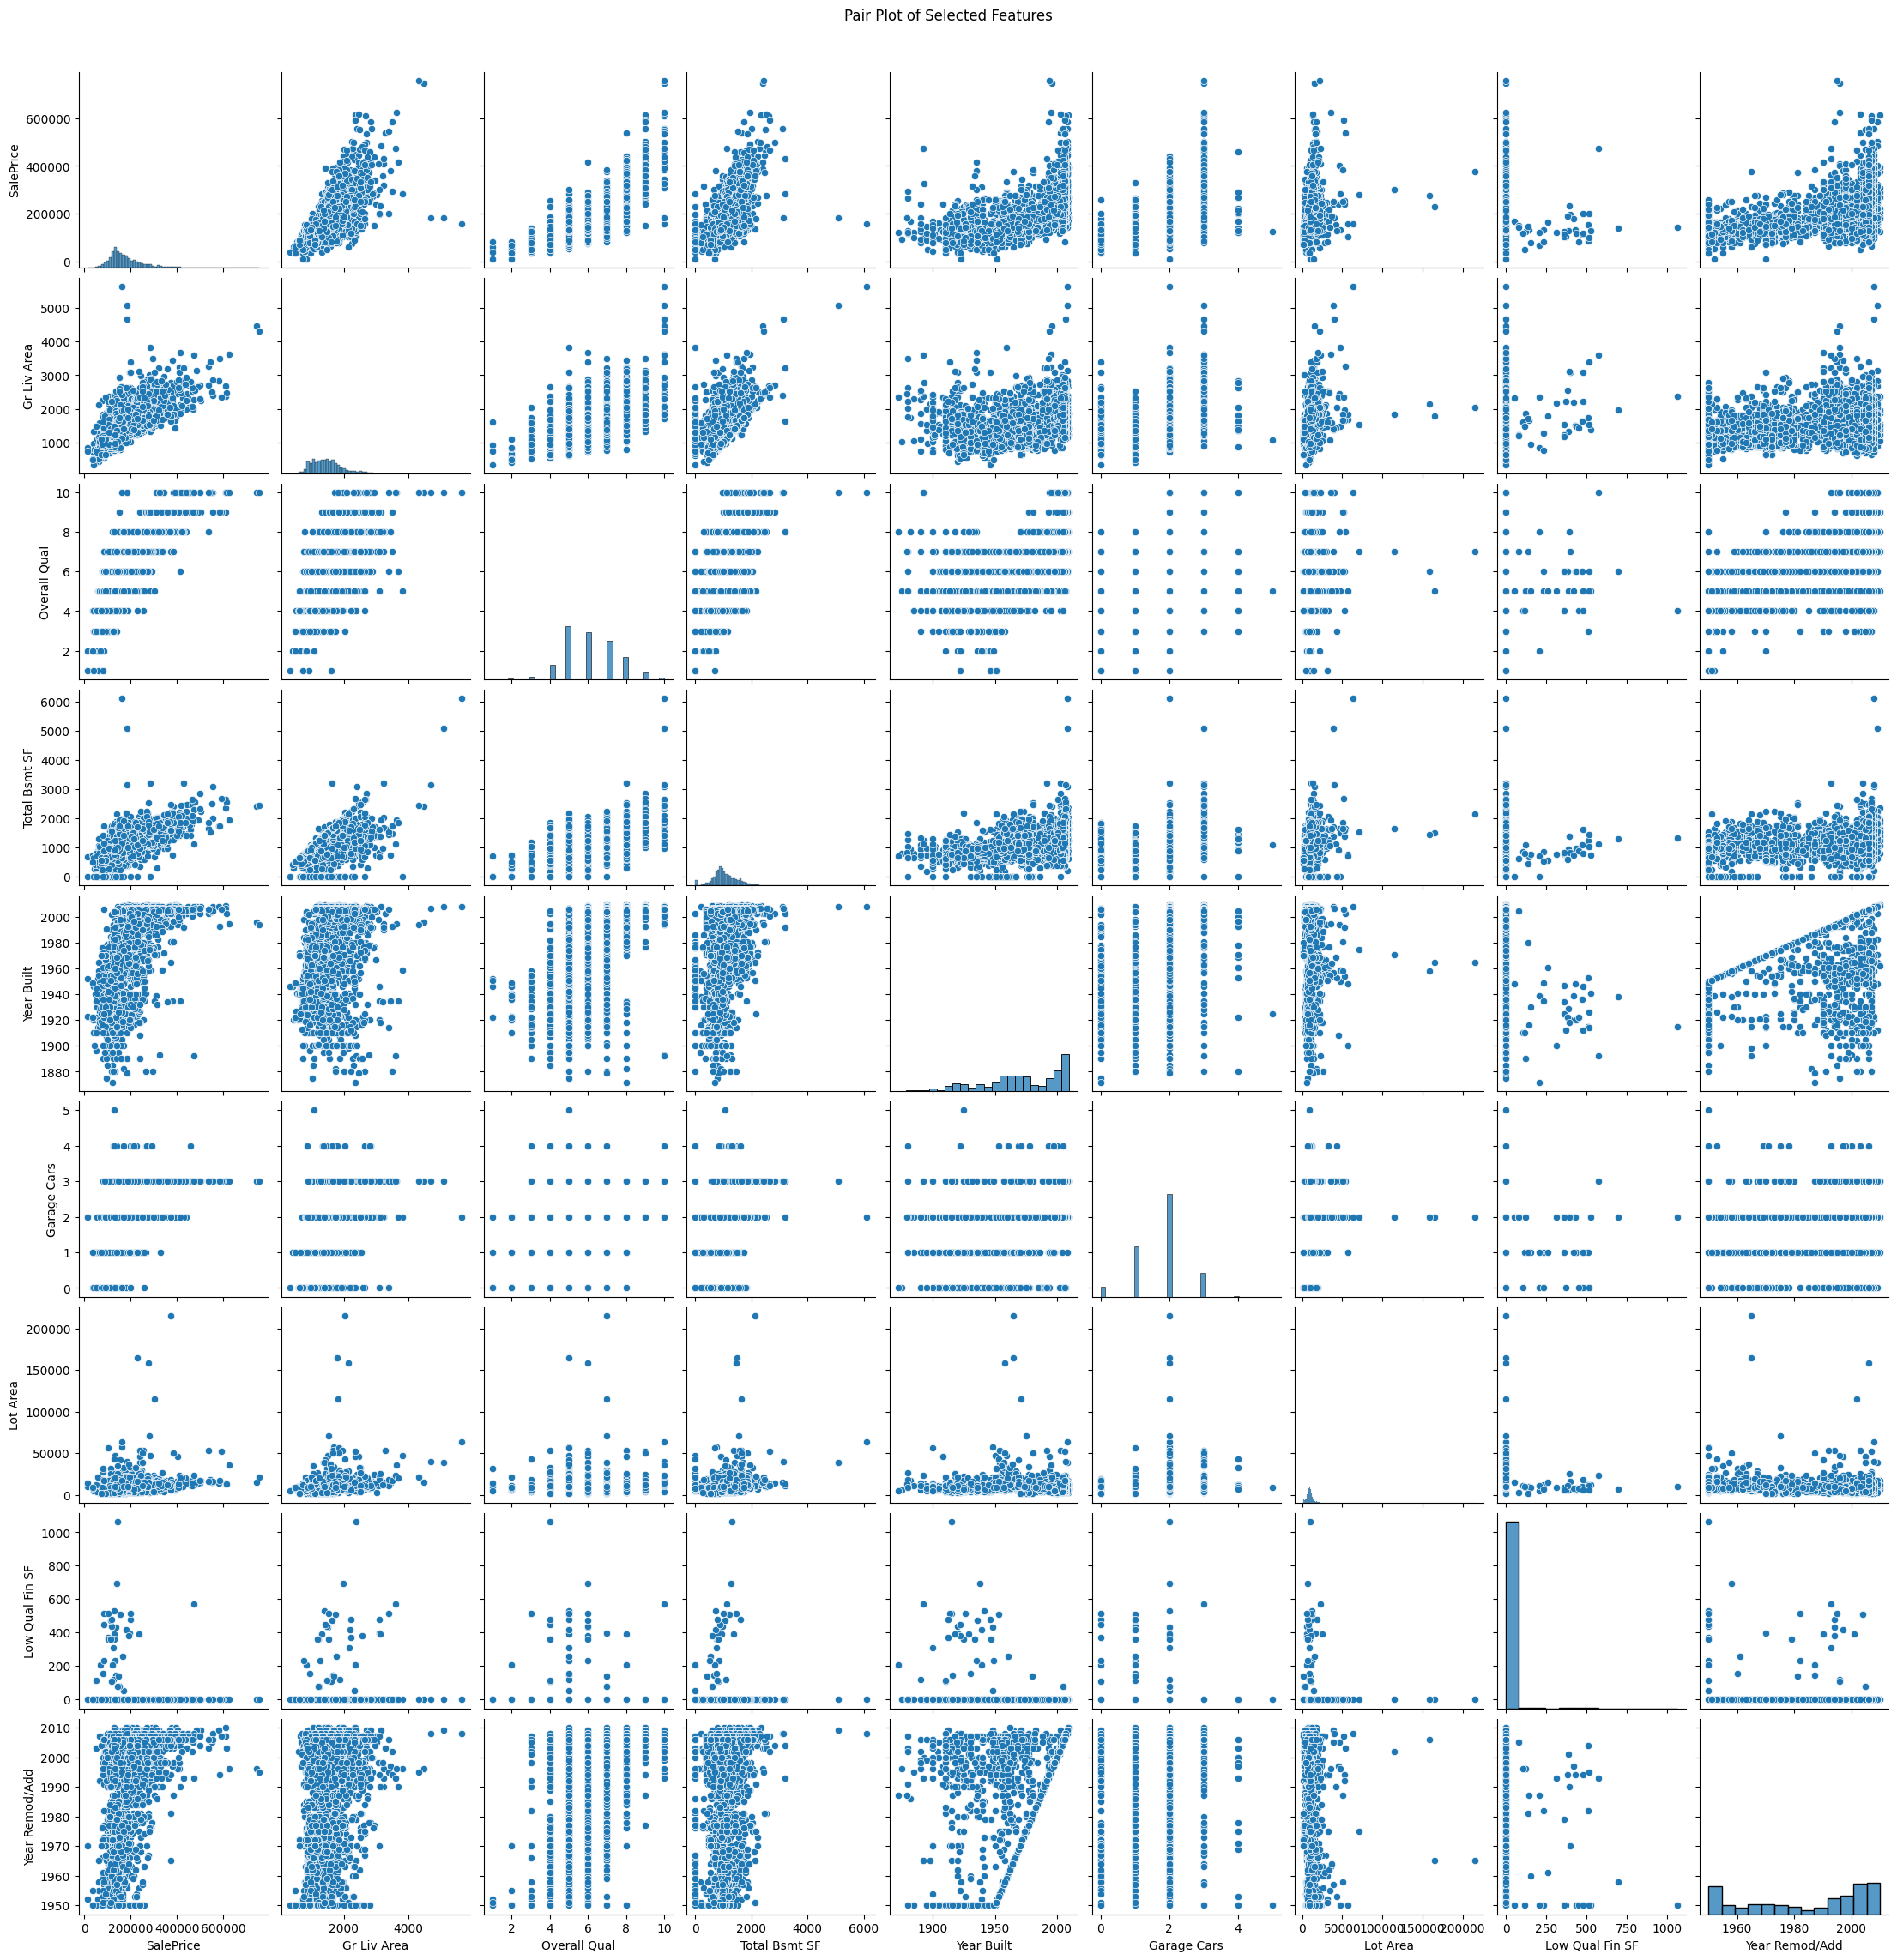

In [14]:
# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features2)

### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.

#### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `SalePrice` and both `Gr Liv Area` and `Total Bsmt SF`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

2. **Discrete Distribution of Overall Qual**:
   - **Insight**: `Overall Qual` appears as a discrete variable in the pair plots, with significant gaps between categories. This suggests that it is more ordinal in nature.
   - **Implication**: Given its ordinal nature, `Overall Qual` might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.

3. **Potential Multicollinearity**:
   - **Insight**: The strong correlations between `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` suggest potential multicollinearity, which could inflate variance in model coefficients.
   - **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.

### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).